# DATA PREPARATIONS

In [2]:
import pandas as pd # For data manipulation
import numpy as np # For numerical operations
import matplotlib.pyplot as plt # For data visualization
import seaborn as sns # For statistical plots
from sklearn.model_selection import train_test_split # For splitting data into training and test sets
from sklearn.preprocessing import StandardScaler, LabelEncoder # For data preprocessing
from sklearn.ensemble import RandomForestClassifier # Machine learning model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix # Model evaluation

In [3]:
# Load Dataset
file_path = "C:/Users/gigam/Documents/python/Customer Retention Analysis/ecommerce_customer_data.csv"

df = pd.read_csv(file_path)

In [4]:
df.head()

,Customer_ID,Age,Gender,Location,Last_Purchase_Date,Purchase_Amount,Purchase_Frequency,Site_Visits,Email_Opens,Coupon_Usage,Churn
0,CUST_0001,56,Female,Lagos,2023-11-24,389.58,9,44,14,1,1
1,CUST_0002,46,Male,Lagos,2023-02-27,334.07,2,40,4,4,1
2,CUST_0003,32,Female,Abuja,2023-01-13,100.75,5,43,21,4,0
3,CUST_0004,60,Female,Port Harcourt,2023-05-21,95.31,6,22,15,3,0
4,CUST_0005,25,Female,Lagos,2023-05-06,58.21,7,20,12,1,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_ID         900 non-null    object 
 1   Age                 900 non-null    int64  
 2   Gender              900 non-null    object 
 3   Location            900 non-null    object 
 4   Last_Purchase_Date  900 non-null    object 
 5   Purchase_Amount     900 non-null    float64
 6   Purchase_Frequency  900 non-null    int64  
 7   Site_Visits         900 non-null    int64  
 8   Email_Opens         900 non-null    int64  
 9   Coupon_Usage        900 non-null    int64  
 10  Churn               900 non-null    int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 77.5+ KB


# DATA CLEANING

In [6]:
# Remove Rows With Missing Values
df.dropna(inplace=True)

In [21]:
df['Last_Purchase_Date'] = pd.to_datetime(df['Last_Purchase_Date'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Customer_ID         900 non-null    object        
 1   Age                 900 non-null    int64         
 2   Gender              900 non-null    object        
 3   Location            900 non-null    object        
 4   Last_Purchase_Date  900 non-null    datetime64[ns]
 5   Purchase_Amount     900 non-null    float64       
 6   Purchase_Frequency  900 non-null    int64         
 7   Site_Visits         900 non-null    int64         
 8   Email_Opens         900 non-null    int64         
 9   Coupon_Usage        900 non-null    int64         
 10  Churn               900 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(6), object(3)
memory usage: 77.5+ KB


In [9]:
# Check For Duplicates
df.duplicated().sum()

0

# CHURN PREDICTION USING ML

In [27]:
# Create New Features (Recency, Frequency, monetary)

current_date = pd.to_datetime("2024-12-16") # Assume today's date

df['Recency'] = (current_date - df['Last_Purchase_Date']).dt.days
df['Monetary'] = df['Purchase_Amount']
df['Frequency'] = df['Purchase_Frequency']

In [11]:
# Encode Categorical Variables
label = LabelEncoder()
df['Gender'] = label.fit_transform(df['Gender']) # Male=1, female=0
df['Location'] = label.fit_transform(df['Location']) # Convert location to numbers

location_map = dict(zip(label.classes_, label.transform(label.classes_)))
print(location_map)

{'Abuja': 0, 'Ibadan': 1, 'Kano': 2, 'Lagos': 3, 'Port Harcourt': 4}


In [12]:
df['Purchase_Amount'] = np.where(df['Purchase_Amount'] > df['Purchase_Amount'].quantile(0.99),
                                 df['Purchase_Amount'].quantile(0.99),
                                 df['Purchase_Amount'])

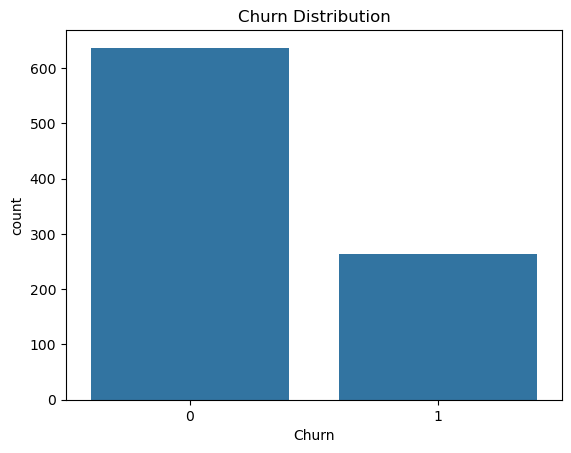

In [25]:
# Visualize Churn Distribution
plt.Figure(figsize=(6, 4))
sns.countplot(x=df["Churn"])
plt.title("Churn Distribution")
plt.show()

In [28]:
# Data Preperation For Prediction
# Features VS Target Variables 

features = ['Age', 'Gender', 'Location', 'Recency', 'Frequency', 'Monetary', 'Site_Visits', 'Email_Opens', 'Coupon_Usage']
x = df[features]
y = df['Churn']


In [15]:
# Normalize Features / Standard Scaling
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [16]:
# Split Data Into Train & Test Sets
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [26]:
# Train Churn Prediction
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [18]:
# Make Predictions
y_pred = model.predict(x_test)

In [19]:
# Evaluate Model Performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

Model Accuracy: 0.72
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.96      0.83       129
           1       0.50      0.10      0.16        51

    accuracy                           0.72       180
   macro avg       0.61      0.53      0.50       180
weighted avg       0.66      0.72      0.64       180



In [22]:
# Save Predictions For Tableau (Visualization)
df['Churn_Prediction'] = model.predict(scaler.transform(x)) # Predict for all the customers
df.to_csv("Cleaned_data.csv", index=False)
print("Cleaned Dataset With Churn Predictions Saved")

Cleaned Dataset With Churn Predictions Saved
